Found 13123 images belonging to 4 classes.
Found 4121 images belonging to 4 classes.
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/25


C:\Users\saite\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


411/411 ━━━━━━━━━━━━━━━━━━━━ 1071s 3s/step - accuracy: 0.2604 - loss: 1.5906 - val_accuracy: 0.4322 - val_loss: 1.3291 - learning_rate: 1.0000e-04
Epoch 2/25
411/411 ━━━━━━━━━━━━━━━━━━━━ 1021s 2s/step - accuracy: 0.3504 - loss: 1.3383 - val_accuracy: 0.4759 - val_loss: 1.2817 - learning_rate: 1.0000e-04
Epoch 3/25
411/411 ━━━━━━━━━━━━━━━━━━━━ 1025s 2s/step - accuracy: 0.4271 - loss: 1.2793 - val_accuracy: 0.4865 - val_loss: 1.2393 - learning_rate: 1.0000e-04
Epoch 4/25
411/411 ━━━━━━━━━━━━━━━━━━━━ 1026s 2s/step - accuracy: 0.4460 - loss: 1.2510 - val_accuracy: 0.4916 - val_loss: 1.2019 - learning_rate: 1.0000e-04
Epoch 5/25
411/411 ━━━━━━━━━━━━━━━━━━━━ 1023s 2s/step - accuracy: 0.4682 - loss: 1.2133 - val_accuracy: 0.5067 - val_loss: 1.1744 - learning_rate: 1.0000e-04
Epoch 6/25
411/411 ━━━━━━━━━━━━━━━━━━━━ 1022s 2s/step - accuracy: 0.4721 - loss: 1.1945 - val_accuracy: 0.5011 - val_loss: 1.1540 - learning_rate: 1.0000e-04
Epoch 7/25
411/411 ━━━━━━━━━━━━━━━━━━━━ 1024s 2s/step - accurac

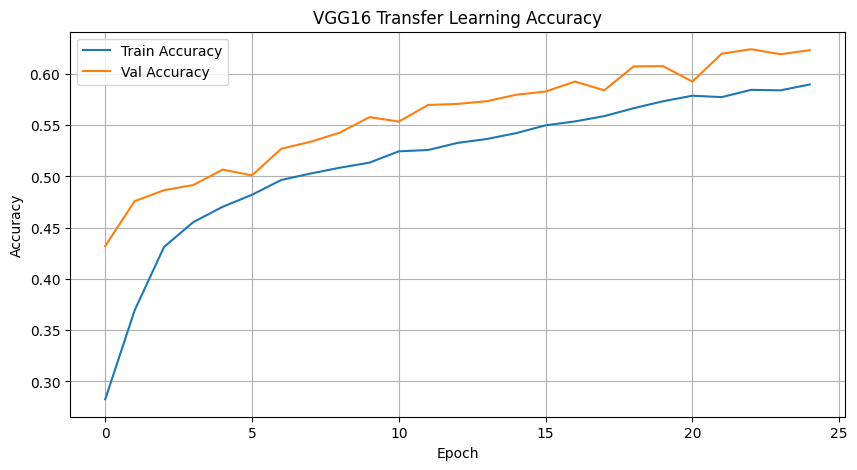

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# data paths
base_dir = "D:/Major Project/normalized"
train_dir = os.path.join(base_dir, "train")
valid_dir = os.path.join(base_dir, "valid")


IMG_SIZE = (224, 224)

# Data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

valid_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='categorical'
)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='categorical'
)

# Load VGG16 without top layers 
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False


x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(4, activation='softmax')(x)  # 4-class output

# model
model = Model(inputs=base_model.input, outputs=output)

# Compile
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)

# Train
history = model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=25,
    callbacks=[early_stop, lr_scheduler]
)

# Save model
model.save("models/vgg16_transfer_teeth_health.h5")

# Plot accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Val Accuracy")
plt.title("VGG16 Transfer Learning Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


Found 3146 images belonging to 4 classes.


C:\Users\saite\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


99/99 ━━━━━━━━━━━━━━━━━━━━ 201s 2s/step - accuracy: 0.6716 - loss: 0.8826
 Final Test Accuracy: 63.73%
 Final Test Loss: 0.8913
99/99 ━━━━━━━━━━━━━━━━━━━━ 201s 2s/step


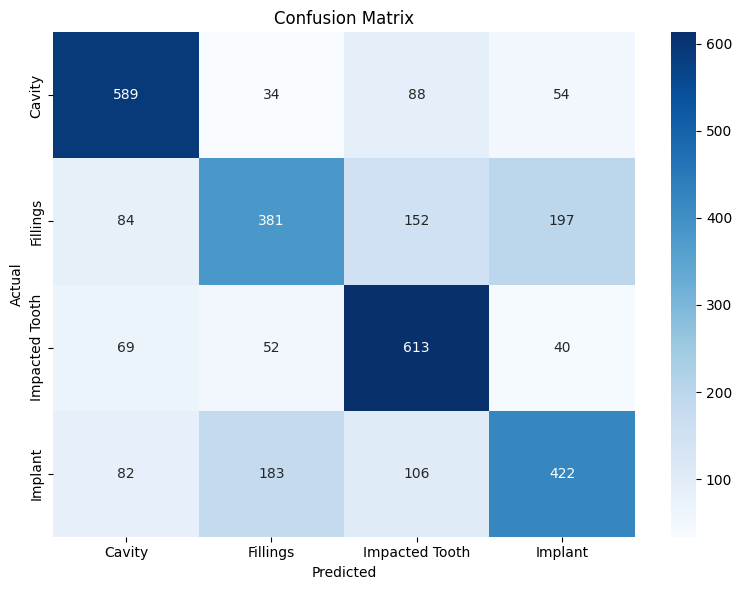

Classification Report:

                precision    recall  f1-score   support

        Cavity       0.71      0.77      0.74       765
      Fillings       0.59      0.47      0.52       814
Impacted Tooth       0.64      0.79      0.71       774
       Implant       0.59      0.53      0.56       793

      accuracy                           0.64      3146
     macro avg       0.63      0.64      0.63      3146
  weighted avg       0.63      0.64      0.63      3146



In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load trained model
model = load_model("models/vgg16_transfer_teeth_health.h5")


test_dir = "D:/Major Project/normalized/test"


test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Evaluating test set
loss, accuracy = model.evaluate(test_generator)
print(f" Final Test Accuracy: {accuracy * 100:.2f}%")
print(f" Final Test Loss: {loss:.4f}")


# Predict
pred_probs = model.predict(test_generator)
y_pred = np.argmax(pred_probs, axis=1)
y_true = test_generator.classes

# Class labels
class_labels = list(test_generator.class_indices.keys())

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

# Classification Report 
report = classification_report(y_true, y_pred, target_names=class_labels)
print("Classification Report:\n")
print(report)
